In [1]:
import numpy as np
from models.random_forest import RandomForest
# from models.xgboost import XGBoost
from models.multilayer_perceptron import MLP
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

desire = 'Eat'
choice_type = 'mode'
experiment_id = 'randomforest01'
num_sample = 10000

rf_model = RandomForest(data_dir='data')
mlp_model = MLP(data_dir='data')

rf_model.run_experiment(experiment_id, num_sample, desire, choice_type)
# xg_model.run_experiment(experiment_id, num_sample, desire, choice_type)
mlp_model.run_experiment(experiment_id, num_sample, desire, choice_type)

best_params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
loss: 0.9938122315191977
brier_score: 0.19922901608789054
mean_error: 0.16873224763674227 

best_params: {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.0001, 'solver': 'adam'}
loss: 0.9831417418962201
brier_score: 0.1973747433151753
mean_error: 0.22054797398692158 



In [3]:
models = {
    'Random Forest': rf_model,
    # 'MLP': mlp_model
}

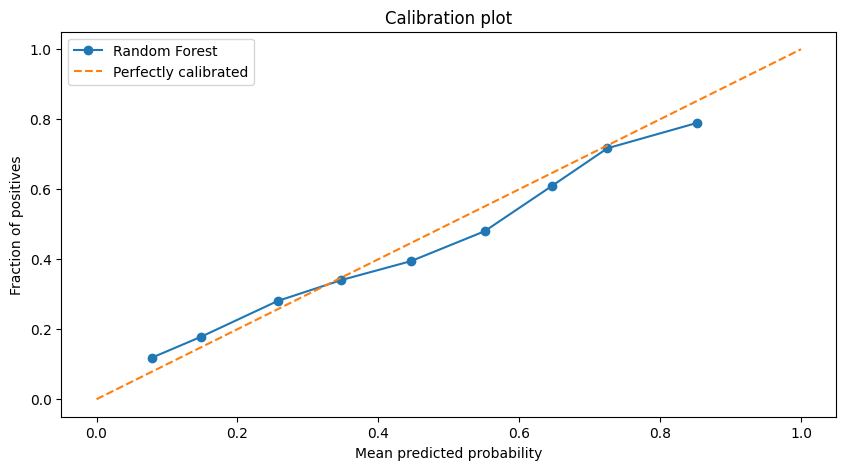

In [4]:
def plot_calibration_curve(n_bins=10, class_index=0):
    plt.figure(figsize=(10, 5))
    for key in models.keys():
        model = models[key]
        y_true = model.y_test
        y_prob = model.predict_proba(model.X_test)
        prob_true, prob_pred = calibration_curve(
            y_true == class_index, y_prob[:, class_index], n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o',
                 label=f'{key}')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
    plt.xlabel('Mean predicted probability')
    plt.ylabel('Fraction of positives')
    plt.title('Calibration plot')
    plt.legend()
    plt.show()


plot_calibration_curve()